In [15]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, GlobalAveragePooling1D,Flatten, GlobalAveragePooling2D,GlobalMaxPool3D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import text, sequence
import matplotlib.pyplot as plt
from tensorflow.keras  import layers
import numpy as np

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [17]:
path  =  "/content/drive/MyDrive/new1/data/train.csv/train.csv"
train =  pd.read_csv(path)
train = data.sample(frac=1)

In [18]:
data.describe

<bound method NDFrame.describe of                       id  ... identity_hate
2029    0583be1568566122  ...             0
101121  1d40cf206baae3c9  ...             0
68494   b73ab3dde4725c5e  ...             0
122920  9196df2930f773de  ...             0
18856   31bdb06b082bb022  ...             0
...                  ...  ...           ...
154625  b0c3a2a7f4643f64  ...             0
48219   80e5a4a8fdf66e23  ...             0
73193   c3d31809128dfacb  ...             0
78894   d3239062ab22d4e2  ...             0
43657   74876b8611575101  ...             0

[159571 rows x 8 columns]>

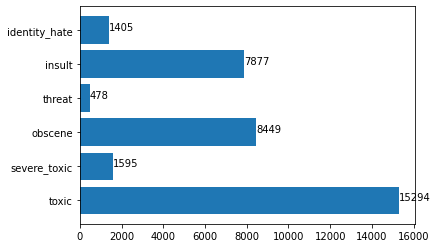

In [19]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

toxic =  sum(train["toxic"])
severe_toxic = sum(train["severe_toxic"])
obscene = sum(train["obscene"])
threat = sum(train["threat"])
insult =  sum(train["insult"])
identity_hate = sum(train["identity_hate"])


list_value = [toxic, severe_toxic, obscene, threat, insult, identity_hate]


plt.barh(list_classes, list_value)
  
for index, value in enumerate(list_value):
    plt.text(value, index,str(value))
  
plt.show()


In [20]:
max_features = 20000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use
embedding_dim = 128  # how big is each word vector


list_sentences_train = data["comment_text"].fillna("CVxTz").values
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = data[list_classes].values

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)

X_t = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
x_train, x_test = X_t[:111700], X_t[111700:]
y_train, y_test = y[:111700],  y[111700:]

In [21]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [22]:
#update this for each  model
file_path = "../models/weights_base.best.hdf5"
checkpoint = ModelCheckpoint(file_path, verbose=1, save_best_only=True, mode="min")
early = EarlyStopping(mode="min", patience=20)
callbacks_list = [checkpoint, early]  # early

batch_size = 64
epochs = 5


In [23]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

210338


In [24]:
#subbstitute for other models
filters = 250
kernel_size =  5
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Dropout(0.1))
model.add(layers.Conv1D(filters, kernel_size,padding='valid', activation='relu', strides=1))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(6, activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          26923264  
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 250)           160250    
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [26]:
model1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, callbacks=callbacks_list)

Epoch 1/5
1222/1222 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9198
Epoch 00001: val_loss improved from inf to 0.05171, saving model to ../models/weights_base.best.hdf5
1222/1222 [==============================] - 520s 425ms/step - loss: 0.0726 - accuracy: 0.9198 - val_loss: 0.0517 - val_accuracy: 0.9941
Epoch 2/5
1222/1222 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9572
Epoch 00002: val_loss improved from 0.05171 to 0.05079, saving model to ../models/weights_base.best.hdf5
1222/1222 [==============================] - 515s 421ms/step - loss: 0.0453 - accuracy: 0.9572 - val_loss: 0.0508 - val_accuracy: 0.9927
Epoch 3/5
1222/1222 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.8752
Epoch 00003: val_loss did not improve from 0.05079
1222/1222 [==============================] - 512s 419ms/step - loss: 0.0356 - accuracy: 0.8752 - val_loss: 0.0571 - val_accuracy: 0.9359
Epoch 4/5
1222/1222 [====================

In [27]:
y_pred = model.predict(x_test, batch_size=64, verbose=1)
print(y_pred)

748/748 [==============================] - 29s 39ms/step
[[6.6989362e-03 9.5448760e-11 2.0560290e-06 6.0613843e-09 7.2436292e-06
  2.7440394e-09]
 [6.7936658e-06 3.0356977e-11 1.2017967e-06 2.2763385e-09 1.3947368e-07
  1.3401801e-09]
 [3.7187338e-04 6.8586992e-08 4.3118598e-06 4.8226798e-06 6.2163395e-05
  3.0496716e-04]
 ...
 [5.6385147e-10 8.9891016e-18 1.0826715e-11 1.7602652e-14 3.0846440e-11
  7.4120540e-14]
 [3.2646733e-06 1.2739792e-08 6.8426602e-06 4.1224234e-07 7.2812718e-06
  1.5722277e-06]
 [3.2314628e-01 9.7815355e-06 1.5372813e-02 5.7978694e-05 1.8676221e-03
  5.8855847e-05]]


In [28]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("loss:", loss);
print("accuracy:", accuracy)

loss: 0.07090464979410172
accuracy: 0.8037434220314026


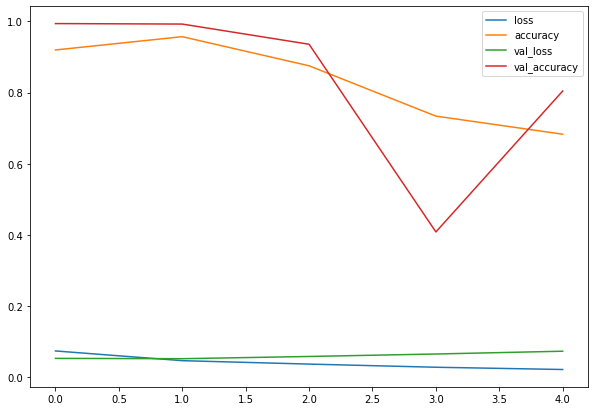

In [29]:
pd.DataFrame(model1.history).plot(figsize=(10, 7))

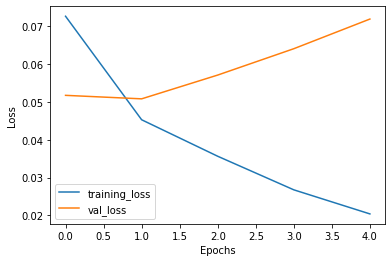

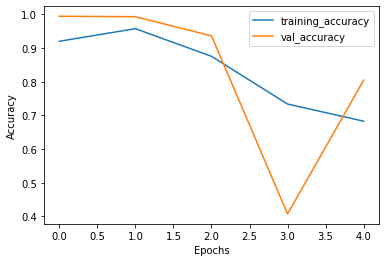

In [30]:
plot_loss_curves(model1)

In [31]:
y_pred1 = []
for i in  range(len(y_pred)):
 seq_prediction = list(map(lambda x: 0 if x<0.5 else 1, y_pred[i]))
 y_pred1.append(seq_prediction)
#print(seq_predictions[0])

#Convert y_test vector from [0 0 0 0 0 0] to [0,0,0,0,0,0] as y_test1
y_test1= []
for i in  range(len(y_test)):
 seq_prediction = list(map(lambda x: 0 if x<0.5 else 1, y_test[i]))
 y_test1.append(seq_prediction)
#print(y_test1)

In [32]:
y_test1 = np.array(y_test1)
y_pred1=np.array(y_pred1)

In [33]:
def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if  (sum(np.logical_or(y_true[i], y_pred[i]))==0):
             continue
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]
    
def Hamming_Loss(y_true, y_pred):
    temp=0
    for i in range(y_true.shape[0]):
        temp += np.size(y_true[i] == y_pred[i]) - np.count_nonzero(y_true[i] == y_pred[i])
    return temp/(y_true.shape[0] * y_true.shape[1])

def Precision(y_true, y_pred):
      temp = 0
      for i in range(y_true.shape[0]):
          if sum(y_true[i]) == 0:
              continue
          temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_true[i])
      return temp/ y_true.shape[0]
                                
def Recall(y_true, y_pred):
      temp = 0
      for i in range(y_true.shape[0]):
          if sum(y_pred[i]) == 0:
              continue
          temp+= sum(np.logical_and(y_true[i], y_pred[i]))/ sum(y_pred[i])
      return temp/ y_true.shape[0]
                                
def F1Measure(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        if (sum(y_true[i]) == 0) and (sum(y_pred[i]) == 0):
            continue
        temp+= (2*sum(np.logical_and(y_true[i], y_pred[i])))/ (sum(y_true[i])+sum(y_pred[i]))
    return temp/ y_true.shape[0]       


print("Accuracy:", Accuracy(y_test1, y_pred1))                        
print("Hamming Loss:", Hamming_Loss(y_test1, y_pred1))   
print("Precision:", Precision(y_test1, y_pred1))      
print("Recall:", Recall(y_test1, y_pred1))   
print("F1Measure:",F1Measure(y_test1, y_pred1))  
print("Exact Match Ratio:", np.all(y_pred1 == y_test1, axis=1).mean())
print("0/1 loss ratio:",np.any(y_test1 != y_pred1, axis=1).mean())

Accuracy: 0.05906115741611128
Hamming Loss: 0.019890260631001373
Precision: 0.06613189613753628
Recall: 0.07049709984472137
F1Measure: 0.0652146206542392
Exact Match Ratio: 0.9103423784754862
0/1 loss ratio: 0.0896576215245138


In [34]:
import sklearn.metrics
print('Exact Match Ratio: {0}'.format(sklearn.metrics.accuracy_score(y_test1, y_pred1, normalize=True, sample_weight=None)))
print('Zero one loss: {0}'.format(sklearn.metrics.zero_one_loss(y_true=y_test1, y_pred=y_pred1))) 
print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_test1, y_pred1)))

Exact Match Ratio: 0.9103423784754862
Zero one loss: 0.08965762152451384
Hamming loss: 0.019890260631001373


In [35]:
#samples
print('Jaccard Score: {0}'.format(sklearn.metrics.jaccard_score(y_true=y_test1, y_pred=y_pred1,average='samples')))
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test1, y_pred=y_pred1, average='samples'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test1, y_pred=y_pred1, average='samples')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test1, y_pred=y_pred1, average='samples')))

Jaccard Score: 0.05906115741611136
Recall: 0.07049709984472158
Precision: 0.0661318961375363
F1 Measure: 0.06521462065423964


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-sc

In [36]:
#micro
print('Jaccard Score: {0}'.format(sklearn.metrics.jaccard_score(y_true=y_test1, y_pred=y_pred1,average='micro')))
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test1, y_pred=y_pred1, average='micro'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test1, y_pred=y_pred1, average='micro')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test1, y_pred=y_pred1, average='micro')))

Jaccard Score: 0.564922702002894
Recall: 0.75949626292618
Precision: 0.6879985160452606
F1 Measure: 0.7219816049442795


In [37]:
#macro
print('Jaccard Score: {0}'.format(sklearn.metrics.jaccard_score(y_true=y_test1, y_pred=y_pred1,average='macro')))
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test1, y_pred=y_pred1, average='macro'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test1, y_pred=y_pred1, average='macro')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test1, y_pred=y_pred1, average='macro'))) 

Jaccard Score: 0.4287014067081995
Recall: 0.6741676011299416
Precision: 0.5254384550800696
F1 Measure: 0.5806350255337813


In [38]:
#weighted
print('Jaccard Score: {0}'.format(sklearn.metrics.jaccard_score(y_true=y_test1, y_pred=y_pred1,average='weighted')))
print('Recall: {0}'.format(sklearn.metrics.precision_score(y_true=y_test1, y_pred=y_pred1, average='weighted'))) 
print('Precision: {0}'.format(sklearn.metrics.recall_score(y_true=y_test1, y_pred=y_pred1, average='weighted')))
print('F1 Measure: {0}'.format(sklearn.metrics.f1_score(y_true=y_test1, y_pred=y_pred1, average='weighted'))) 

Jaccard Score: 0.5680262505124187
Recall: 0.7588516444696863
Precision: 0.6879985160452606
F1 Measure: 0.7175506974308652


In [39]:
print(sklearn.metrics.classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4676
           1       0.51      0.35      0.41       497
           2       0.87      0.69      0.77      2619
           3       0.65      0.27      0.38       158
           4       0.75      0.64      0.69      2411
           5       0.51      0.43      0.46       421

   micro avg       0.76      0.69      0.72     10782
   macro avg       0.67      0.53      0.58     10782
weighted avg       0.76      0.69      0.72     10782
 samples avg       0.07      0.07      0.07     10782



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test1, y_pred1)

array([[[41989,  1206],
        [  990,  3686]],

       [[47210,   164],
        [  324,   173]],

       [[44993,   259],
        [  821,  1798]],

       [[47690,    23],
        [  116,    42]],

       [[44933,   527],
        [  871,  1540]],

       [[47280,   170],
        [  242,   179]]])

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
cm = multilabel_confusion_matrix(y_test1, y_pred1)

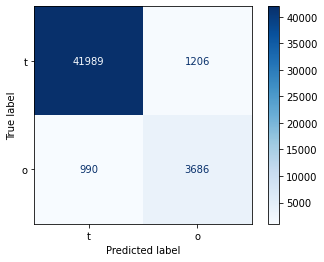

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[0], display_labels=list_classes[0])
disp.plot(cmap=plt.cm.Blues)
plt.show()

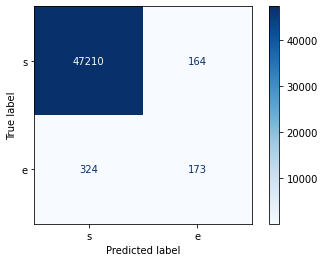

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[1], display_labels=list_classes[1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

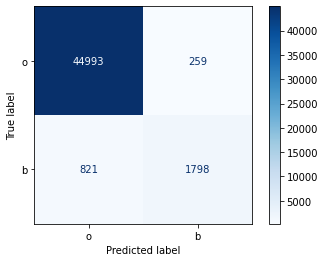

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[2], display_labels=list_classes[2])
disp.plot(cmap=plt.cm.Blues)
plt.show()

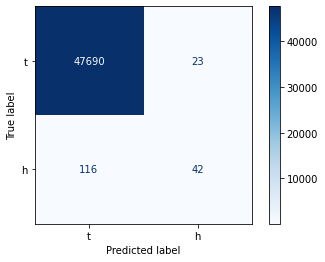

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[3], display_labels=list_classes[3])
disp.plot(cmap=plt.cm.Blues)
plt.show()

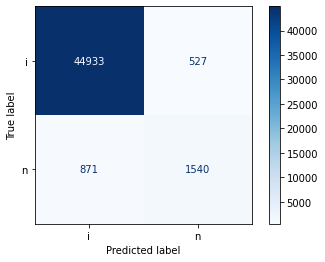

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[4], display_labels=list_classes[4])
disp.plot(cmap=plt.cm.Blues)
plt.show()

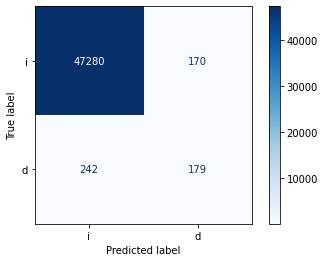

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm[5], display_labels=list_classes[5])
disp.plot(cmap=plt.cm.Blues)
plt.show()